In [11]:
pip install -r requirements.txt

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium
import rasterio
import geopandas as gpd

In [13]:
nepal='./Shape_Data/local_unit.shp'
df=gpd.read_file('./Shape_Data/local_unit.shp')
df.head()

STATE_CODE   DISTRICT        GaPa_NaPa     Type_GN Province  \
0           1  TAPLEJUNG  Aathrai Tribeni  Gaunpalika        1   
1           1  TAPLEJUNG       Maiwakhola  Gaunpalika        1   
2           1  TAPLEJUNG        Meringden  Gaunpalika        1   
3           1  TAPLEJUNG       Mikwakhola  Gaunpalika        1   
4           1  TAPLEJUNG     Phaktanglung  Gaunpalika        1   

                                            geometry  
0  POLYGON ((87.60985 27.37043, 87.61107 27.36943...  
1  POLYGON ((87.50402 27.42901, 87.50672 27.42831...  
2  POLYGON ((87.51272 27.56894, 87.51255 27.56859...  
3  POLYGON ((87.6885 27.70975, 87.68891 27.70938,...  
4  POLYGON ((87.83673 27.95137, 87.83735 27.95119...

In [14]:
df.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 777 entries, 0 to 776
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   STATE_CODE  777 non-null    int32   
 1   DISTRICT    777 non-null    object  
 2   GaPa_NaPa   777 non-null    object  
 3   Type_GN     777 non-null    object  
 4   Province    777 non-null    object  
 5   geometry    777 non-null    geometry
dtypes: geometry(1), int32(1), object(4)
memory usage: 33.5+ KB


In [15]:
df.crs

<Geographic 2D CRS: GEOGCS["NepalDD",DATUM["D_Everest_Bangladesh",SPHE ...>
Name: NepalDD
Axis Info [ellipsoidal]:
- lon[east]: Longitude (Degree)
- lat[north]: Latitude (Degree)
Area of Use:
- undefined
Datum: D_Everest_Bangladesh
- Ellipsoid: Everest 1830 (1937 Adjustment)
- Prime Meridian: Greenwich

In [16]:
df.geometry

0      POLYGON ((87.60985 27.37043, 87.61107 27.36943...
1      POLYGON ((87.50402 27.42901, 87.50672 27.42831...
2      POLYGON ((87.51272 27.56894, 87.51255 27.56859...
3      POLYGON ((87.6885 27.70975, 87.68891 27.70938,...
4      POLYGON ((87.83673 27.95137, 87.83735 27.95119...
                             ...                        
772    POLYGON ((84.32537 27.68957, 84.32562 27.6894,...
773    POLYGON ((82.65382 28.65759, 82.65428 28.65724...
774    POLYGON ((82.76718 28.80407, 82.76748 28.80383...
775    POLYGON ((82.67327 28.85214, 82.67373 28.85205...
776    POLYGON ((82.87365 28.83199, 82.87402 28.83178...
Name: geometry, Length: 777, dtype: geometry

In [17]:
df.describe()

STATE_CODE
count  777.000000
mean     3.651223
std      2.000799
min      1.000000
25%      2.000000
50%      3.000000
75%      5.000000
max      7.000000

In [18]:
df.isnull().sum() #checking for missing values if any

STATE_CODE    0
DISTRICT      0
GaPa_NaPa     0
Type_GN       0
Province      0
geometry      0
dtype: int64

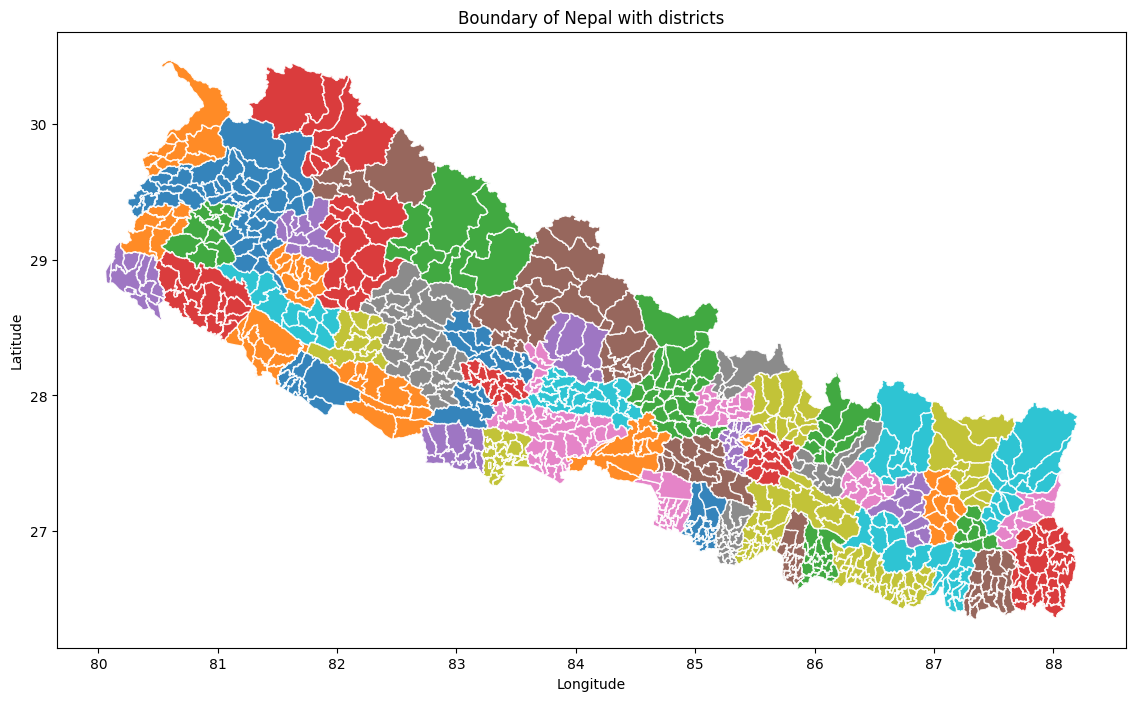

In [19]:
ax=df.plot(figsize=(14,8), column='DISTRICT',edgecolor='white',alpha=0.9)
ax.set_ylabel('Latitude')
ax.set_xlabel('Longitude')
ax.set_title('Boundary of Nepal with districts')
plt.show()

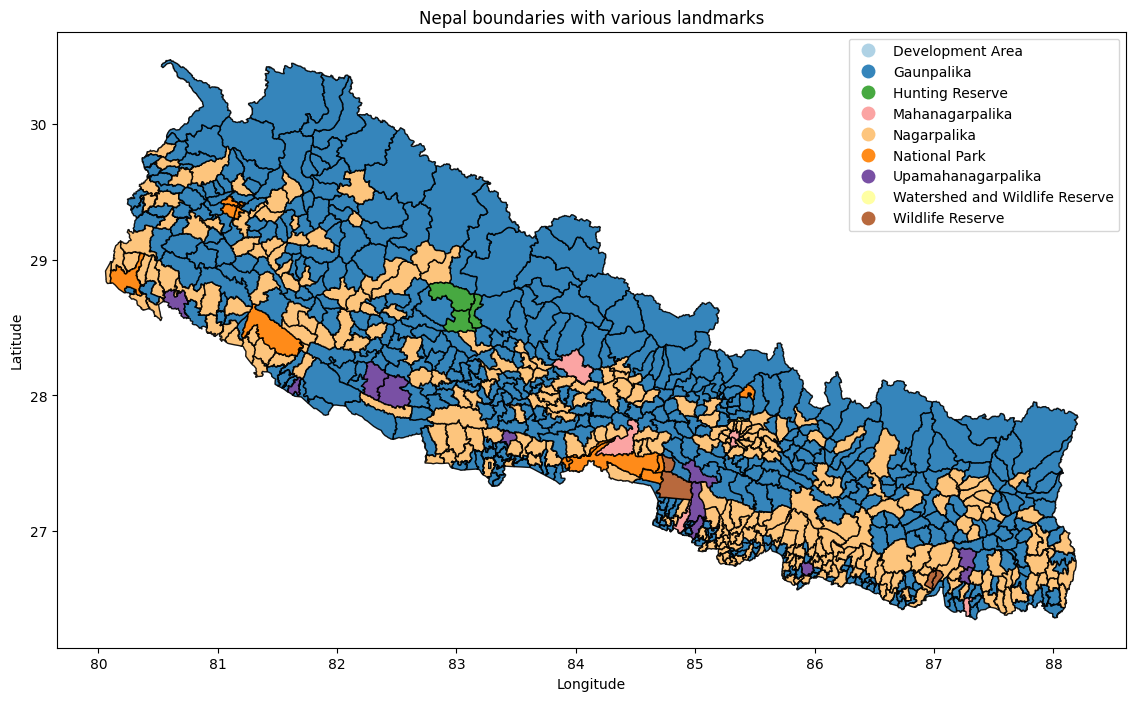

In [20]:
df.plot(figsize=(14,8), column='Type_GN',legend=True,cmap='Paired',edgecolor='black',alpha=0.9)
plt.title('Nepal boundaries with various landmarks')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

In [21]:
precipitation_path_2020="./nepal_climate_data/nepal_precipitation_2020.tif"
precipitation_path_2050="./nepal_climate_data/nepal_precipitation_2050.tif"
temperature_path_2020="./nepal_climate_data/nepal_temperature_2020.tif"
temperature_path_2050="./nepal_climate_data/nepal_temperature_2050.tif"

Number of bands : 12
Shape of the raster data of year 2020: (200, 400)
extend of the raster data of year 2020 : BoundingBox(left=80.0, bottom=26.3, right=88.2, top=30.5)
Minumum temperature : -15.461176406160137
Maximum temperature : 16.05297897078062


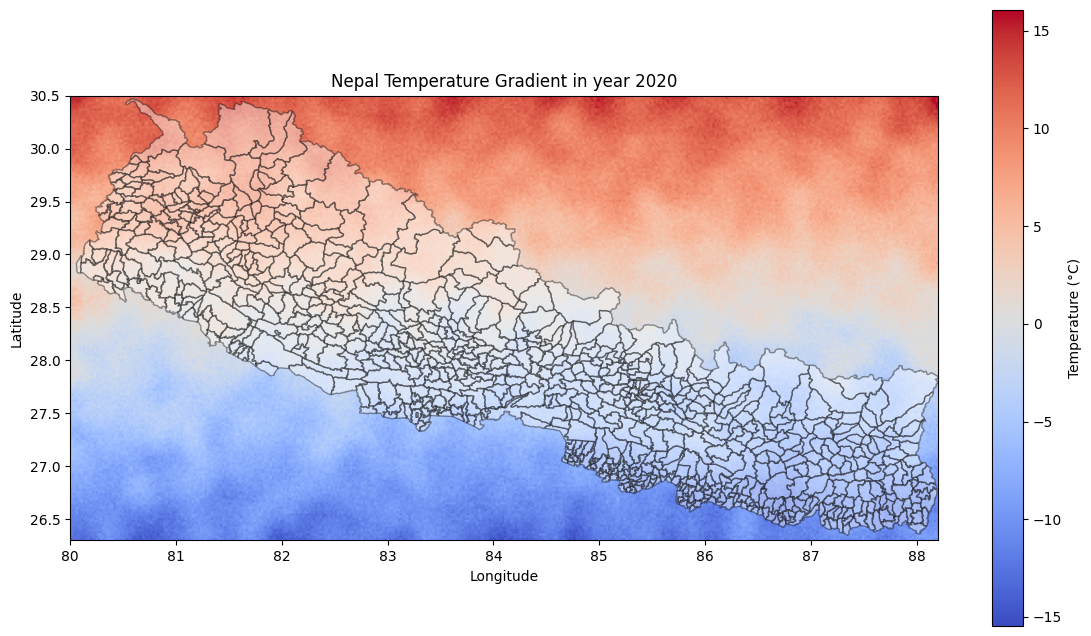

Number of bands : 12
Shape of the raster data of year 2050: (200, 400)
extend of the raster data of year 2050 : BoundingBox(left=80.0, bottom=26.3, right=88.2, top=30.5)
Minumum temperature : -14.901385895662502
Maximum temperature : 18.931724700941384


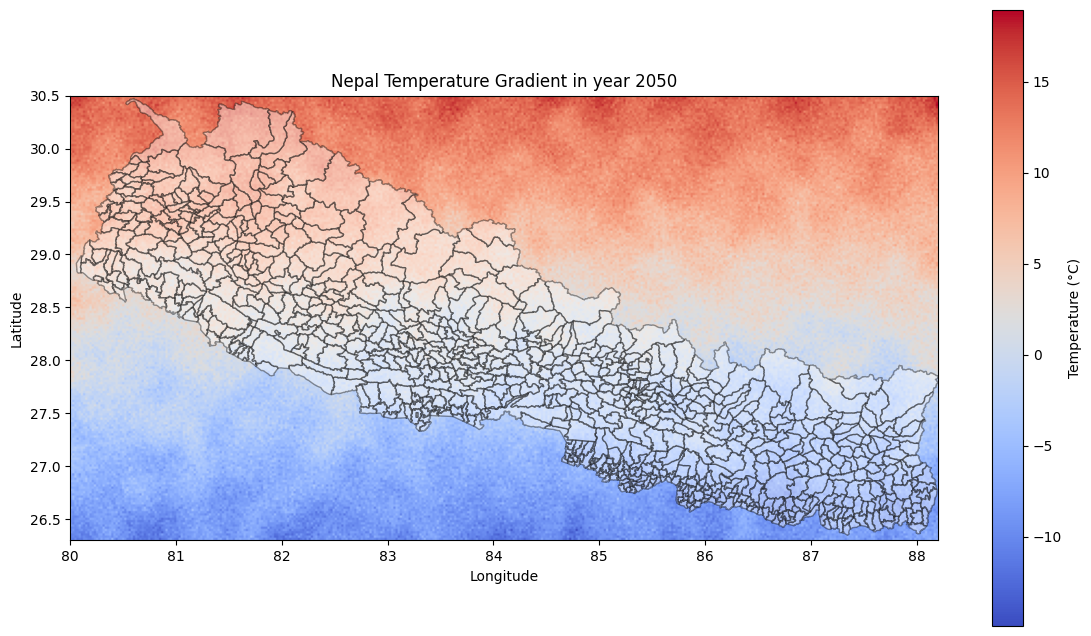

In [22]:
path=[temperature_path_2020,temperature_path_2050]
year=['2020','2050']
for i,path in zip(range(0,2),path):
    with rasterio.open(path) as src1: # Load temperature data from tif file
        temp_data=src1.read(4) #read the 4th band (temperature data), most appropriate min/max
        extent=src1.bounds #get the extend of raster data ie top bottom left right
        print(f"Number of bands : {src1.count}") #prints the number of bands in raster data

    #printing the shape and extend of the raster data
    print(f"Shape of the raster data of year {year[i]}: {temp_data.shape}")
    print(f"extend of the raster data of year {year[i]} : {extent}")

    #checking out the min and max temp
    min_temp=np.min(temp_data)
    max_temp=np.max(temp_data)
    print(f"Minumum temperature : {min_temp}")
    print(f"Maximum temperature : {max_temp}")

    # Plot the temperature data using imshow and overlay on Nepal's shapefile
    fig, ax = plt.subplots(figsize=(14, 8))

    # Plotting Nepal map (shapefile)
    df.plot(ax=ax, edgecolor="black", facecolor="white", alpha=0.4)

    # Plotting temperature data (TIFF) on top of the map of Nepal's boundaries with manual color scaling
    im = ax.imshow(temp_data, cmap="coolwarm", extent=[extent.left, extent.right, extent.bottom, extent.top], vmin=min_temp, vmax=max_temp)

    # Adding colorbar (Legend)
    cbar = plt.colorbar(im, ax=ax)
    cbar.set_label("Temperature (°C)")

    # Set title and labels
    ax.set_title(f"Nepal Temperature Gradient in year {year[i]}")
    ax.set_xlabel("Longitude")
    ax.set_ylabel("Latitude")
    plt.show()


# Analysis from above Nepal's temperature gradient

- It is seen that from the data taken for analysis the plotted image shows that the temperature reaches to higher 15 degrees celcius at the north whereas the south is facing negative temperatures which is practically incorrect. Since, At the south lies the cities like Nepalgunj, Butwal, Biratnagar, Birgunj for which the temperature reaches to the max of 40-45 degrees in summers and to the north lies the Himalayas where the temperature should have been in negative.

- In comparision to temperature gradients of 4th band of 2020 and 2050 there is only a minor deviation in minimum and maximum temperature.

- 2020
    - Minumum temperature : -15.461176406160137
    - Maximum temperature : 16.05297897078062
      

- 2050
    - Minumum temperature : -14.901385895662502
    - Maximum temperature : 18.931724700941384



Number of bands : 12
The shape of the precipitaion raster data of 2020 is : (200, 400)
The extent of precipitation raster data of 2020 is : BoundingBox(left=80.0, bottom=26.3, right=88.2, top=30.5)
The minimum value of raster data of 2020 is : 20.64714600913425
The maximum value of raster data of 2020 is : 311.1281914708154

Number of bands : 12
The shape of the precipitaion raster data of 2050 is : (200, 400)
The extent of precipitation raster data of 2050 is : BoundingBox(left=80.0, bottom=26.3, right=88.2, top=30.5)
The minimum value of raster data of 2050 is : -4.5088722320402495
The maximum value of raster data of 2050 is : 458.0992048396041



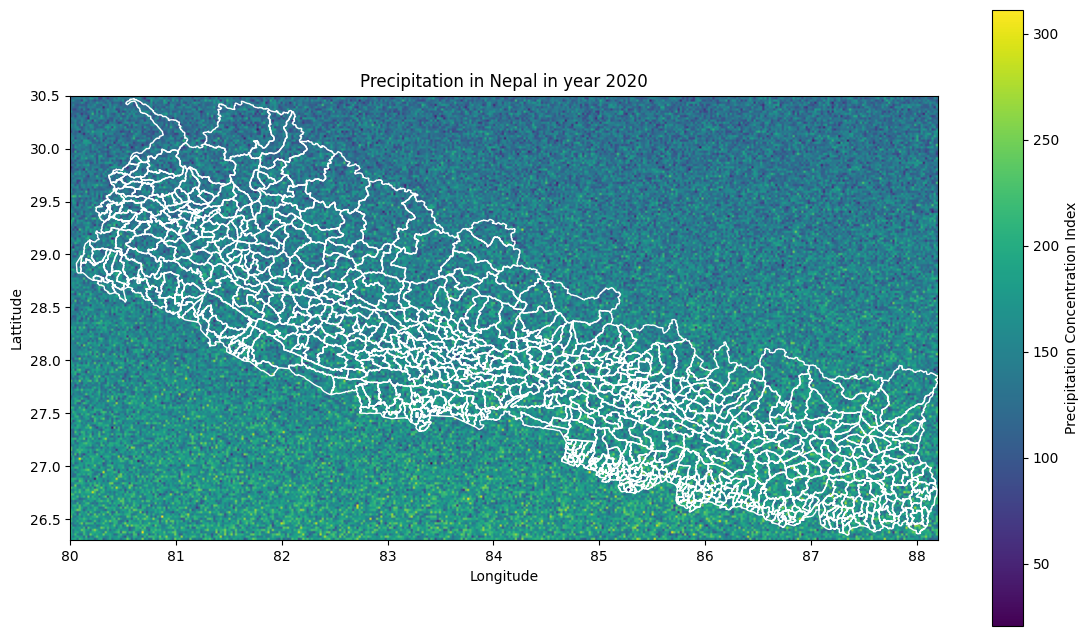

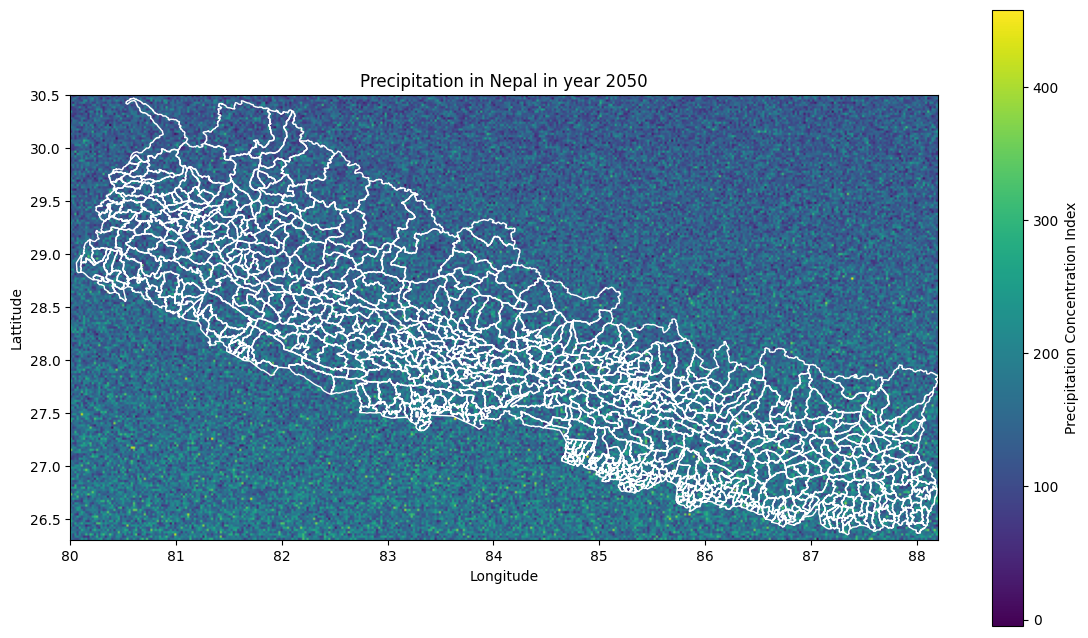

In [24]:
paths=[precipitation_path_2020,precipitation_path_2050]
year=['2020','2050']
for j,paths in zip(range(0,2),paths):
    with rasterio.open(paths) as src2:#Load precipitation data from .tif file
        precp_data=src2.read(4) #reading the 4th band precipitation data
        extent_precp =src2.bounds #get the extent of precipitation raster data ie top bottom left right
        print(f"Number of bands : {src2.count}") #prints the number of bands in raster data

    #displaying the shape, extents minimum and maximum values of the raster data
    print(f"The shape of the precipitaion raster data of {year[j]} is : {precp_data.shape}")
    print(f"The extent of precipitation raster data of {year[j]} is : {extent_precp}")
    min_precp=np.min(precp_data)
    max_precp=np.max(precp_data)
    print(f"The minimum value of raster data of {year[j]} is : {min_precp}")
    print(f"The maximum value of raster data of {year[j]} is : {max_precp}\n")

    #plotting the Nepal's vector data(shape file) overlaying the precipitaion raster data (tif file)
    fig,ax=plt.subplots(figsize=(14,8))
    df.plot(ax=ax,edgecolor='white',facecolor='none',alpha = 1) #Plotting the Nepal's vector data
    ax.set_title(f'Precipitation in Nepal in year {year[j]}')#setting the title of the plot
    ax.set_xlabel('Longitude')
    ax.set_ylabel('Lattitude')

    #Using the imshow function of pyplot module in matplotlib to display the data in image format (raster data)
    im2=plt.imshow(precp_data,extent=[extent_precp.left,extent_precp.right,extent_precp.bottom,extent_precp.top],cmap='viridis',vmin=min_precp,vmax=max_precp)

    #setting up the colorbar
    cbar=plt.colorbar(im2,ax=ax)
    cbar.set_label('Precipitation Concentration Index')

# Precipitation analysis in Nepal in year 2020 and 2050

- By the above figure we can see the precipitation or (rainfall in mm) is lower in norther part of nepal whereas the precipitation is higher in southern part of Nepal.

- We can see from above image the northern part of nepal faces comparatively lower precipitation concentration index(PCI) ie lower than 100 mm in most pixels or areas in 2020 data

- The southern part has comparatively higher precipitation concentration index(PCI) ie higher than 250 mm in most pixels or areas in 2020 data

- In comparision to the precipitation data of 2020 and 2050 major deviations can be seen in minimum and maximum precipitations:

    - The minimum value of raster data of 2020 is : 20.64714600913425
    - The maximum value of raster data of 2020 is : 311.1281914708154

    - The minimum value of raster data of 2050 is : -4.5088722320402495
    - The maximum value of raster data of 2050 is : 458.0992048396041

- However precipitation concentration index shows low PCI in 2050 in comparision to 2020

In [151]:
#writing the functions to extract the bandwise data from the raster data i.e. 12 bands is equal to 12 months

#function to read the raster data from tif file and then iterating band wise data
def monthly_values(path):
    with rasterio.open(path) as src:
        monthly_val=[src.read(i) for i in range(1,13)]
        return monthly_val

#function to calculate the mean of the datas month on month basis
def monthly_mean(monthly_val):
    monthly_mean=[np.mean(month) for month in monthly_val]
    return monthly_mean

#function to calculate the mean,median and the standard deviation of the monthly mean datas
def computing_summary(monthly_mean,label,year):
    stats={
        'Mean':np.mean(monthly_mean),
        'Median':np.median(monthly_mean),
        'Standard_Deviation':np.std(monthly_mean)
    }
    print(f"\nComputing the summary for {label} of {year} : ")
    for key,value in stats.items(): #iterating to print the key and values calculated from the dictionary
        print(f"{key} : {value:.2f}")
    return ("")
    


In [125]:
monthly_temp_2020=monthly_values(temperature_path_2020)
monthly_temp_2050=monthly_values(temperature_path_2050)
monthly_precp_2020=monthly_values(precipitation_path_2020)
monthly_precp_2050=monthly_values(precipitation_path_2050)

monthly_temp_mean_2020=monthly_mean(monthly_temp_2020)
monthly_temp_mean_2050=monthly_mean(monthly_temp_2050)
monthly_precp_mean_2020=monthly_mean(monthly_precp_2020)
monthly_precp_mean_2050=monthly_mean(monthly_precp_2050)

computing_summary(monthly_temp_mean_2020,"Temperature",2020)
computing_summary(monthly_temp_mean_2050,"Temperature",2050)
computing_summary(monthly_precp_mean_2020,"Precipitation",2020)
computing_summary(monthly_precp_mean_2050,"Precipitation",2050)





Computing the summary for Temperature of 2020 : 
Mean : -7.58
Median : -7.58
Standard_Deviation : 5.42

Computing the summary for Temperature of 2050 : 
Mean : -5.47
Median : -5.47
Standard_Deviation : 5.42

Computing the summary for Precipitation of 2020 : 
Mean : 249.89
Median : 165.21
Standard_Deviation : 203.85

Computing the summary for Precipitation of 2050 : 
Mean : 265.50
Median : 165.21
Standard_Deviation : 229.50


''

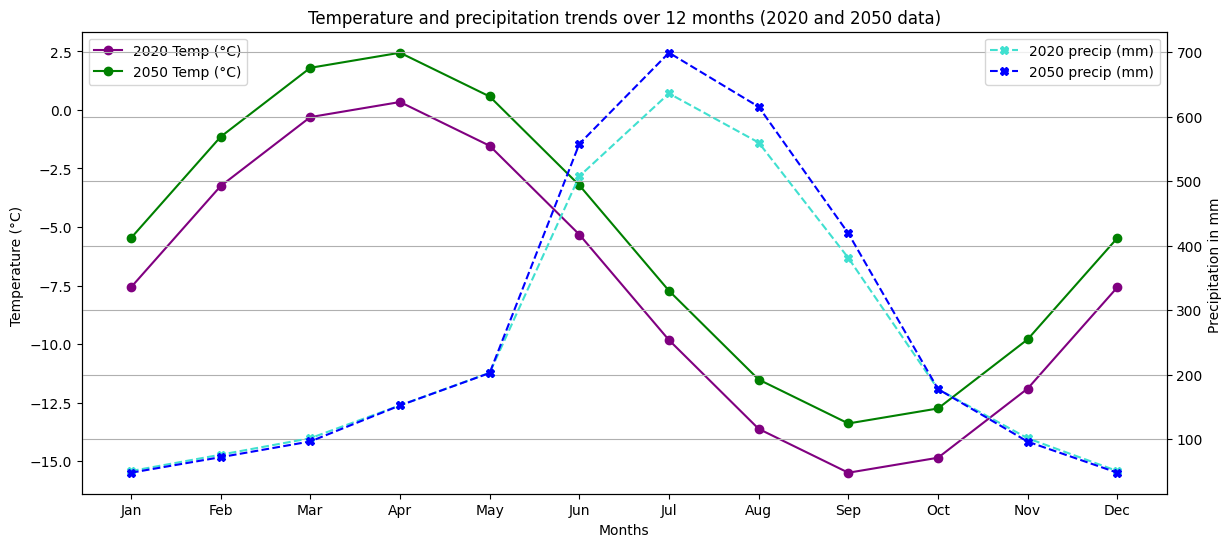

In [154]:
#comparing the temperature and precipitation trend over a single graph usin twin axis
fig,ax=plt.subplots(figsize=(14,6))

#plotting the line for mean temperature for each band/months in 2020 and 2050
ax.plot(range(1,13),monthly_temp_mean_2020,marker='o', linestyle="-",color='purple',label='2020 Temp (°C)')
ax.plot(range(1,13),monthly_temp_mean_2050,marker='o',linestyle='-',color='green',label='2050 Temp (°C)')
ax.set_ylabel("Temperature (°C) ")


#defining the twin axis for precipitation and plotting the precipitation mean data for 2020 and 2050
ax1=ax.twinx()
ax1.plot(range(1,13),monthly_precp_mean_2020,marker='X',color="turquoise",linestyle="--",label='2020 precip (mm)')
ax1.plot(range(1,13),monthly_precp_mean_2050,marker='X',color='blue',linestyle="--",label='2050 precip (mm)')
ax1.set_ylabel("Precipitation in mm ")

ax.set_title("Temperature and precipitation trends over 12 months (2020 and 2050 data)")
ax.legend(loc='upper left') #legend for temperature
ax1.legend(loc='upper right') #legend for precipitation
plt.grid(True)
plt.xticks(range(1,13),['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']) #formating x axis with 12 months
ax.set_xlabel('Months')
plt.show()




# Analysis of temperature and precipitation over 12 months for year 2020 and 2050

### - In the figure above we can see that the temperature varies as per summer,monsoon,spring and winter over 12 months period, however by the trend we can see the temperature is in increasing trend as the voilet solid line gives the 2020 temperature trend and green solid line determines the 2050 temperature trend and clearly the temperature is in increasing trend over the years. This may be due to the increasing global warming,deforestation and urbanization.

### - Also in the twin graph above the precipitation is high during monsoon season as expected. Turquoise dotted line gives the 2020 precipitation trend whereas blue dotted line shows the 2050 precipitation trend. As per the graph formed for precipitation, the there seem to be heavy rainfall in june,july,august and september 2050 compared to 2020 which may cause flood,landslides and soil erosions. So, drastic measures is needed to be taken during these months in order to prevent losses.